## INTRODUCTION

In this project you are going to predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3        # Data is in sqllite3

# Subdue warnings
import warnings

### NOTE

The data that is provided is a sqllite3 database


In [2]:
# Estaslish connection to the database
con = sqlite3.connect("soccer/database.sqlite")
data = pd.read_sql_query("Select * from Player_Attributes", con)

In [3]:
# See whether data is there
data.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [4]:
# Description of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [5]:
# Check for nulls in the dataset
data.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

#### ANALYSIS

- Overall Rating is the dependent variable and has nulls. IT would be best to drop these nulls. We could replace the nulls with mean values, but as it would be the predicted value it could interfere with the values being predicted. Hence dropping the nulls in this columns.
- Also the id columns wont effect the prediction so remove them as well

In [6]:
# Drop nulls from the overall_ratings columns
player_data = data[data.overall_rating.notnull()]

In [7]:
player_data = player_data.drop(["id","player_fifa_api_id","player_api_id", "date"], axis=1)

In [8]:
# Check for nulls in the new dataset
player_data.isnull().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                1877
dribbling                 0
curve                  1877
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                1877
reactions                 0
balance                1877
shot_power                0
jumping                1877
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                 1877
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle         1877
gk_diving                 0
gk_handling               0
gk_kicking          

#### ANALYSIS

- Every player needs to have qualities shown above, that are null. So we will replace those columns with the mean in the column

In [9]:
player_data.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,181265.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,52.965675,49.380950,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,18.255788,17.831746,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [10]:
# replace mean in volleys
player_data.volleys.fillna(value=np.mean(player_data.volleys), inplace=True)

In [11]:
# replace mean in curve
player_data.curve.fillna(value=np.mean(player_data.curve), inplace=True)

In [12]:
# replace mean in agility
player_data.agility.fillna(value=np.mean(player_data.agility), inplace=True)
# replace mean in balance
player_data.balance.fillna(value=np.mean(player_data.balance), inplace=True)
# replace mean in jumping
player_data.jumping.fillna(value=np.mean(player_data.jumping), inplace=True)
# replace mean in vision
player_data.vision.fillna(value=np.mean(player_data.vision), inplace=True)
# replace mean in sliding_tackle
player_data.sliding_tackle.fillna(value=np.mean(player_data.sliding_tackle), inplace=True)

In [13]:
# Check for nulls
player_data.isnull().sum()

overall_rating            0
potential                 0
preferred_foot            0
attacking_work_rate    2394
defensive_work_rate       0
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                    0
penalties                 0
marking                   0
standing_tackle           0
sliding_tackle            0
gk_diving                 0
gk_handling               0
gk_kicking          

#### ANALYSIS

The attacking_work_rate is an object. <br>
There is a value called none as well in the column. So lets replace Nan with None

In [14]:
player_data.attacking_work_rate.fillna(value="None", inplace=True)

In [15]:
# Check if there are still null values
player_data.isnull().sum().sum()

0

#### FEATURE ENGNINEERING
preferred_foot         183142 non-null object <br>
attacking_work_rate    180748 non-null object <br>
defensive_work_rate    183142 non-null object <br>

The above columns are objects, so need to convert them using one hot encoding

In [16]:
# One hot encoding
preferred_foot_dummy = pd.get_dummies(player_data.preferred_foot, drop_first=True, prefix="pref_foot")
attacking_work_rate = pd.get_dummies(player_data.attacking_work_rate, drop_first=True, prefix="atk_wrk_rate")
defensive_work_rate_dummy = pd.get_dummies(player_data.defensive_work_rate, drop_first=True, prefix="def_wrk_rate")

In [17]:
# Add these columns to the main dataset
player_data = pd.concat([player_data, preferred_foot_dummy, attacking_work_rate, defensive_work_rate_dummy], axis=1)

In [18]:
# Drop preferred_foot, attacking_work_rate, defensive_work_rate
player_data.drop(["preferred_foot", "attacking_work_rate", "defensive_work_rate"],axis=1, inplace=True)

In [19]:
# Check the dataset
player_data.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,def_wrk_rate_9,def_wrk_rate__0,def_wrk_rate_ean,def_wrk_rate_es,def_wrk_rate_high,def_wrk_rate_low,def_wrk_rate_medium,def_wrk_rate_o,def_wrk_rate_ormal,def_wrk_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0


#### PLOT THE CORRELATION TO SEE IF WE COULD DROP ANY COLUMN

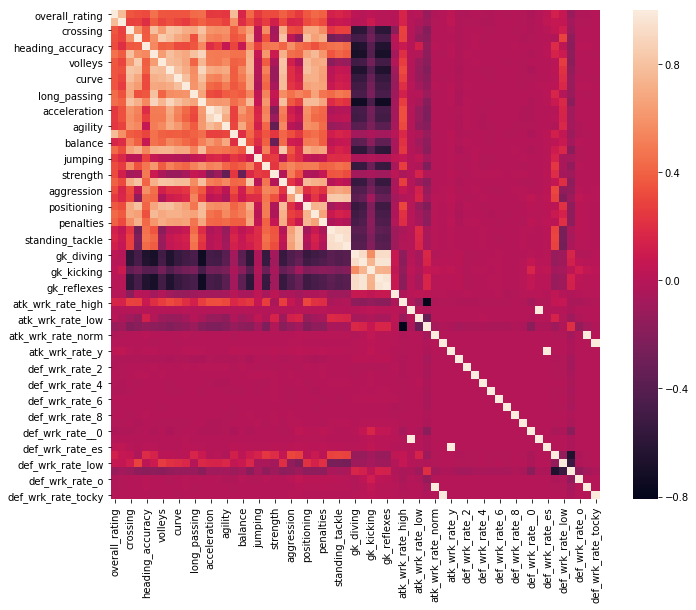

In [20]:
corrmat = player_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

In [21]:
from sklearn.preprocessing import StandardScaler

#### NOTE
As you can clearly see that that data in the independent columns are of different matrix and it only makes sense to scale them down.

In [22]:
scale = StandardScaler()
scaled_input = scale.fit_transform(player_data.drop("overall_rating", axis=1))

C:\Users\Grumpy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Grumpy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_input, player_data.overall_rating, test_size=0.3)

In [25]:
# Apply the model
reg = LinearRegression(n_jobs=-1)

In [26]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [27]:
# Prediction 
pred = reg.predict(X_test)

In [28]:
# Check the prediction
print (r2_score(y_test, pred))

0.8422774987986332


In [29]:
# Mean Squared error
print (mean_absolute_error(y_test, pred))

2.1380760782527486


Text(0.5, 1.0, 'Rating vs Predicted Rating: $Y_i$ vs $\\hat{Y}_i$')

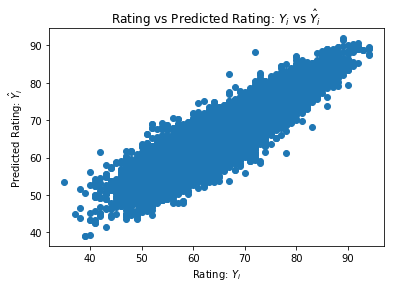

In [30]:
plt.scatter(y_test, pred)
plt.xlabel("Rating: $Y_i$")
plt.ylabel("Predicted Rating: $\hat{Y}_i$")
plt.title("Rating vs Predicted Rating: $Y_i$ vs $\hat{Y}_i$")

### DECISION TREE REGRESSOR

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [32]:
dectree = DecisionTreeRegressor()

#### GRID SEARCH CV

Use grid serach cv to do hyper tuning

In [32]:
# set of parameters to test
param_grid = {"criterion": ["mse"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [43]:
grid_search = GridSearchCV(dectree,param_grid=param_grid,cv=5)

In [44]:
# Compute the parameters
grid_search.fit(scaled_ind, player_data.overall_rating)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse'], 'min_samples_split': [2, 10, 20], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [None, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [33]:
# APply Decison tree with the parameters that are defined above
dtree_new = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
dtree_new.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
predict = dtree_new.predict(X_test)

In [36]:
# Evaluate the performance
print (r2_score(y_test, predict))

0.9590179398271874


Text(0.5, 1.0, 'Rating vs Predicted Rating: $Y_i$ vs $\\hat{Y}_i$')

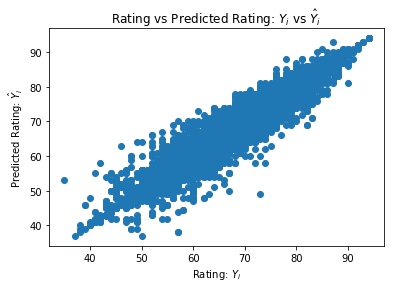

In [37]:
plt.scatter(y_test, predict)
plt.xlabel("Rating: $Y_i$")
plt.ylabel("Predicted Rating: $\hat{Y}_i$")
plt.title("Rating vs Predicted Rating: $Y_i$ vs $\hat{Y}_i$")

### RANDOM FOREST

In [38]:
from sklearn.ensemble import RandomForestRegressor

#### RANDOMISED SEARCH CV

In [39]:
# Use Randomisedserachcv to find the best parameters to run the algorithm
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 300, 500, 800, 1200]
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,8,15,25,30]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5,10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               # 'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 300, 500, 800, 1200], 'max_depth': [5, 8, 15, 25, 30, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [41]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 200.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 300, 500, 800, 1200], 'max_depth': [5, 8, 15, 25, 30, None], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_depth': 30}

In [44]:
# Create a new random roferst with the paramters that are provided above
rf_new = RandomForestRegressor(n_estimators= 1200, min_samples_split= 15, min_samples_leaf= 1, max_depth= 30, n_jobs=-1)

In [45]:
# Fit the model
rf_new.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
predict_rf = rf_new.predict(X_test)

In [47]:
# Evaluate the performance
print (r2_score(y_test, predict_rf))

0.9783685535182214


Text(0.5, 1.0, 'Rating vs Predicted Rating: $Y_i$ vs $\\hat{Y}_i$')

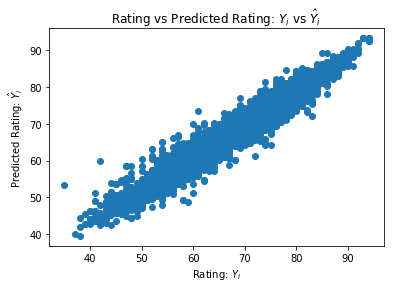

In [48]:
plt.scatter(y_test, predict_rf)
plt.xlabel("Rating: $Y_i$")
plt.ylabel("Predicted Rating: $\hat{Y}_i$")
plt.title("Rating vs Predicted Rating: $Y_i$ vs $\hat{Y}_i$")

### XGBOOST

In [39]:
import xgboost as xgb

In [40]:
# Create an object of XGBOOST
xg = xgb.XGBRegressor(n_jobs=-1)

In [41]:
xg.fit(X_train, y_train)

C:\Users\Grumpy\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:17:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [42]:
prediction = xg.predict(X_test)

In [44]:
# Evaluate the performance
print (r2_score(y_test, prediction))

0.9365711732872588


Text(0.5, 1.0, 'Rating vs Predicted Rating: $Y_i$ vs $\\hat{Y}_i$')

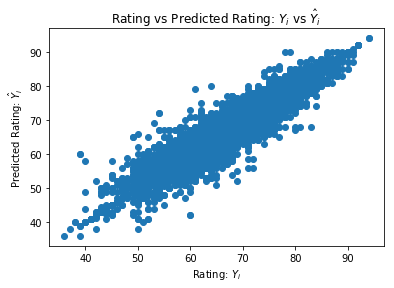

In [45]:
plt.scatter(y_test, predict)
plt.xlabel("Rating: $Y_i$")
plt.ylabel("Predicted Rating: $\hat{Y}_i$")
plt.title("Rating vs Predicted Rating: $Y_i$ vs $\hat{Y}_i$")